In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
city_file="./Resources/city_data.csv"
ride_file="./Resources/ride_data.csv"
city_data_df=pd.read_csv(city_file)
ride_data_df=pd.read_csv(ride_file)


In [3]:
city_data_df.info()
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [4]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [6]:
city_data_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [7]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [8]:
pyber_data_df=pd.merge(city_data_df,ride_data_df, how="left", on=["city","city"])
# new_df[150:175]
pyber_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850


In [9]:
city_types=pyber_data_df.groupby("type").count()
city_types

,city,driver_count,date,fare,ride_id
type,,,,,
Rural,125,125,125,125,125
Suburban,625,625,625,625,625
Urban,1625,1625,1625,1625,1625


In [10]:
urban_df=pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850


In [11]:
suburban_df=pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_df.head()

,city,driver_count,type,date,fare,ride_id
1625,Port Shane,7,Suburban,2019-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2019-04-23 16:05:47,42.26,8341982666719
1627,Port Shane,7,Suburban,2019-03-02 12:06:00,14.95,2803204948363
1628,Port Shane,7,Suburban,2019-03-26 04:33:30,19.03,6010401984537
1629,Port Shane,7,Suburban,2019-03-15 12:09:42,31.58,2552978514662


In [12]:
rural_df=pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_df.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2019-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2019-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2019-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2019-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2019-04-10 20:46:11,43.25,623928772332


In [79]:
rural_df.describe()

,driver_count,fare,ride_id
count,125.000000,125.000000,1.250000e+02
mean,4.296000,34.623440,4.647746e+12
std,2.691156,14.558046,2.887834e+12
min,1.000000,10.110000,2.684873e+10
25%,1.000000,19.900000,2.275364e+12
50%,4.000000,37.050000,4.023962e+12
75%,7.000000,47.070000,7.118047e+12
max,9.000000,58.550000,9.990581e+12


In [13]:
urban_ride_count=urban_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count=suburban_df.groupby(["city"]).count()["ride_id"]
rural_ride_count=rural_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [14]:
urban_avg_fare=urban_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare=suburban_df.groupby(["city"]).mean()["fare"]
rural_avg_fare=rural_df.groupby(["city"]).mean()["fare"]

In [15]:
urban_avg_drivers=urban_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_drivers=suburban_df.groupby(["city"]).mean()["driver_count"]
rural_avg_drivers=rural_df.groupby(["city"]).mean()["driver_count"]


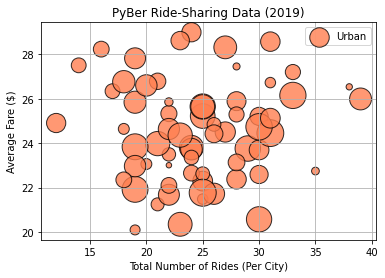

In [16]:
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_avg_drivers,c="coral", edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

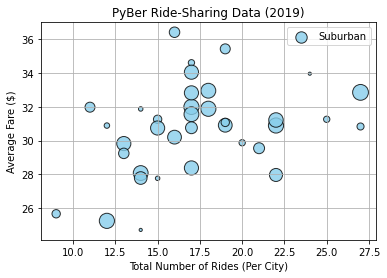

In [17]:
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_avg_drivers,c="skyblue", edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

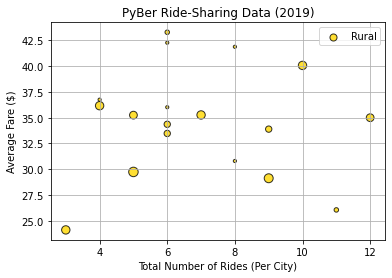

In [18]:
plt.scatter(rural_ride_count,rural_avg_fare,s= 10*rural_avg_drivers,c="gold", edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

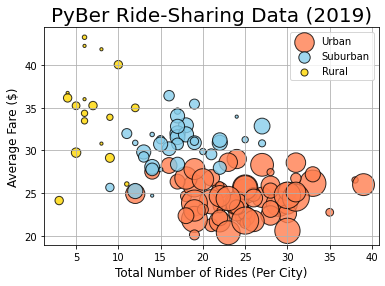

In [19]:
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_avg_drivers,c="coral", edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_avg_drivers,c="skyblue", edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count,rural_avg_fare,s= 10*rural_avg_drivers,c="gold", edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
# Add the legend.
plt.legend()
plt.show()

In [20]:
round(rural_ride_count.mean(),2),round(suburban_ride_count.mean(),2),round(urban_ride_count.median(),2)

(6.94, 17.36, 24.0)

In [21]:
suburban_ride_count.mode()

0    17
dtype: int64

In [22]:
mean_urban_ride=np.mean(urban_ride_count)
median_urban_ride=np.median(urban_ride_count)
mean_urban_ride


24.62121212121212

In [23]:
mode_urban_ride=sts.mode(rural_ride_count)
mode_urban_ride

ModeResult(mode=array([6]), count=array([5]))

In [24]:
urban_fare=urban_df["fare"]
suburban_fare=suburban_df["fare"]
rural_fare=rural_df["fare"]
suburban_fare.head()

1625    27.66
1626    42.26
1627    14.95
1628    19.03
1629    31.58
Name: fare, dtype: float64

In [25]:
urban_fare_mean=np.mean(urban_fare)
urban_fare_median=np.median(urban_fare)
urban_fare_mode=sts.mode(urban_fare)
urban_fare_mode,round(urban_fare_mean),urban_fare_median

(ModeResult(mode=array([22.86]), count=array([5])), 25, 24.64)

In [26]:
suburban_fare_mean=np.mean(suburban_fare)
suburban_fare_median=np.median(suburban_fare)
suburban_fare_mode=sts.mode(suburban_fare)
suburban_fare_mode,round(suburban_fare_mean),suburban_fare_median

(ModeResult(mode=array([17.99]), count=array([3])), 31, 30.75)

In [27]:
rural_fare_mean=np.mean(rural_fare)
rural_fare_median=np.median(rural_fare)
rural_fare_mode=sts.mode(rural_fare)
rural_fare_mode,round(rural_fare_mean),rural_fare_median

(ModeResult(mode=array([37.05]), count=array([2])), 35, 37.05)

In [28]:
urban_driver=urban_df["driver_count"]
suburban_driver=suburban_df["driver_count"]
rural_driver=rural_df["driver_count"]

In [29]:
urban_driver_mean=np.mean(urban_driver)
urban_driver_median=np.median(urban_driver)
urban_driver_mode=sts.mode(urban_driver)
urban_driver_mode,round(urban_driver_mean),urban_driver_median

(ModeResult(mode=array([39]), count=array([86])), 37, 37.0)

In [30]:
suburban_driver_mean=np.mean(suburban_driver)
suburban_driver_median=np.median(suburban_driver)
suburban_driver_mode=sts.mode(suburban_driver)
suburban_driver_mode,round(suburban_driver_mean),suburban_driver_median

(ModeResult(mode=array([20]), count=array([79])), 14, 16.0)

In [31]:
rural_driver_mean=np.mean(rural_driver)
rural_driver_median=np.median(rural_driver)
rural_driver_mode=sts.mode(rural_driver)
rural_driver_mode,round(rural_driver_mean),rural_driver_median

(ModeResult(mode=array([1]), count=array([32])), 4, 4.0)

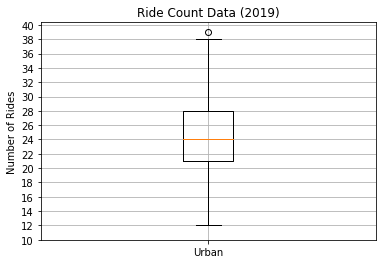

In [32]:
fig, ax = plt.subplots()
x_label = ["Urban"]
ax.boxplot(urban_ride_count, labels= x_label)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

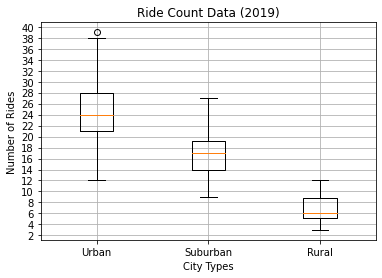

In [33]:
fig, ax = plt.subplots()
x_labels=["Urban", "Suburban", "Rural"]
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_xlabel('City Types')
ax.set_yticks(np.arange(2, 42, step=2.0))
ax.grid()
plt.show()

In [34]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [41]:
urban_driver.describe()

count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

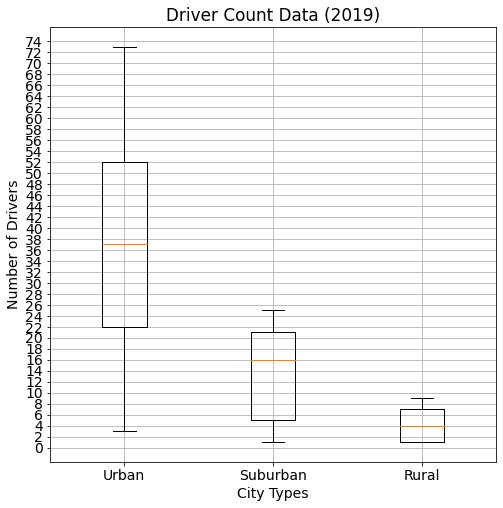

In [59]:
fid, ax = plt.subplots(figsize=(8, 8))
x_label_driver = ["Urban", "Suburban", "Rural"]
driver_count=[urban_driver, suburban_driver, rural_driver]
ax.boxplot(driver_count, labels=x_label_driver)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_xlabel('City Types')
ax.set_yticks(np.arange(0, 75, step=2.0))
ax.grid()
plt.show()

In [47]:
fares_city_types=pyber_data_df.groupby("type").sum()["fare"]
fares_city_types

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [51]:
total_fare=pyber_data_df["fare"].sum()
total_fare

63538.64

In [53]:
percentage_by_types=(fares_city_types/total_fare)*100
percentage_by_types

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

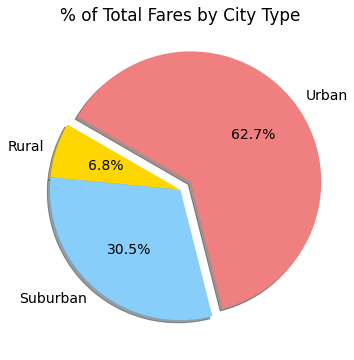

In [60]:
import matplotlib as mpl
plt.subplots(figsize=(10, 6))
plt.pie(percentage_by_types, labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
mpl.rcParams['font.size'] = 14
plt.title("% of Total Fares by City Type")
plt.show()

In [66]:
pyber_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850


In [70]:
#total ride percentage
total_rides=pyber_data_df["ride_id"].count()
ride_count_types=pyber_data_df.groupby("type").count()["ride_id"]
types_ride_percentage=ride_count_types/total_rides*100
types_ride_percentage

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

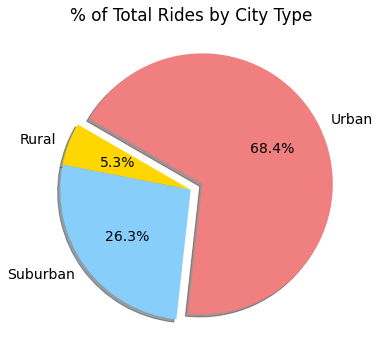

In [72]:
import matplotlib as mpl
plt.subplots(figsize=(10, 6))
plt.pie(types_ride_percentage, labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
mpl.rcParams['font.size'] = 14
plt.title("% of Total Rides by City Type")
plt.show()

In [77]:
total_drivers=pyber_data_df["driver_count"].sum()
driver_count_types=pyber_data_df.groupby("type").sum()["driver_count"]
types_driver_percentage=driver_count_types/total_drivers*100
types_driver_percentage

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

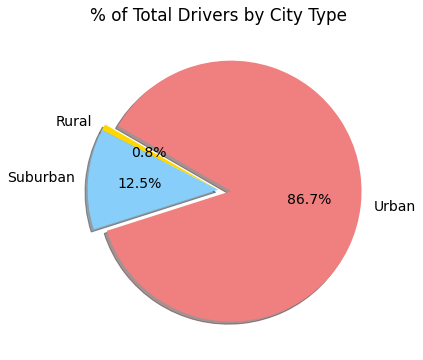

In [78]:
import matplotlib as mpl
plt.subplots(figsize=(10, 6))
plt.pie(types_driver_percentage, labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
mpl.rcParams['font.size'] = 14
plt.title("% of Total Drivers by City Type")
plt.show()